In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [79]:
%matplotlib inline

In [80]:
df = pd.read_excel('v8_after_eda_data.xlsx')

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scalar = StandardScaler()

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 44 columns):
OpportunityID                                 3134 non-null object
Renewal_PreviousPace                          3134 non-null float64
Renewal_PreviousPaidPercentageOfRTR           3134 non-null float64
Renewal_CountPreviousDeals                    3134 non-null int64
Renewal_PreviousCountBounces                  3134 non-null int64
Renewal_PreviousPosition                      3134 non-null int64
Renewal_PreviousHBwLCF                        3134 non-null float64
Renewal_PreviousAvgMonthRevenue               3134 non-null float64
Renewal_PreviousAvgDailyBalance               3134 non-null float64
Renewal_TwoWeekBounces                        3134 non-null int64
NumberOfBankStatements                        3134 non-null int64
BankStatement_MA_OverdraftDays                3134 non-null float64
BankStatement_MA_NumReturnItems               3134 non-null float64
Credit_Score__c     

In [7]:
X = df.drop(["WriteOff_YN",
             "WOGross_AdvanceBalance",
             "FundedWriteOffAmount_Gross",
             "Paybackamount",
             "FundedAmount",
              'OpportunityID'], axis = 'columns')
y = df["WriteOff_YN"]

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 38 columns):
Renewal_PreviousPace                          3134 non-null float64
Renewal_PreviousPaidPercentageOfRTR           3134 non-null float64
Renewal_CountPreviousDeals                    3134 non-null int64
Renewal_PreviousCountBounces                  3134 non-null int64
Renewal_PreviousPosition                      3134 non-null int64
Renewal_PreviousHBwLCF                        3134 non-null float64
Renewal_PreviousAvgMonthRevenue               3134 non-null float64
Renewal_PreviousAvgDailyBalance               3134 non-null float64
Renewal_TwoWeekBounces                        3134 non-null int64
NumberOfBankStatements                        3134 non-null int64
BankStatement_MA_OverdraftDays                3134 non-null float64
BankStatement_MA_NumReturnItems               3134 non-null float64
Credit_Score__c                               3134 non-null float64
Time_in_Business__c

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [16]:
X_train_scaled.shape

(2507, 38)

In [14]:
X_test_scaled.shape

(627, 38)

In [126]:
pca = PCA(0.95)

In [127]:
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [128]:
X_train_trf.shape

(2507, 28)

In [129]:
X_test_trf.shape

(627, 28)

In [130]:
pca.explained_variance_

array([ 4.42762629,  2.65763894,  1.99811895,  1.83657694,  1.79004593,
        1.61288324,  1.46454228,  1.33015105,  1.29799029,  1.23955405,
        1.20660601,  1.13426072,  1.10350413,  1.09786511,  1.07789599,
        1.06040435,  1.01780169,  1.00400514,  0.96024099,  0.93614814,
        0.91840613,  0.88603327,  0.85491595,  0.83888939,  0.77272859,
        0.68290535,  0.54357589,  0.49643045])

In [131]:
sum(pca.explained_variance_)

36.247745239113556

In [132]:
pct_var = pca.explained_variance_/sum(pca.explained_variance_)

In [133]:
pct_var = 100 * pct_var

In [134]:
pct_var

array([ 12.21490125,   7.33187381,   5.51239515,   5.06673431,
         4.9383649 ,   4.44960986,   4.04036796,   3.66961047,
         3.5808856 ,   3.41967214,   3.32877535,   3.12918973,
         3.04433868,   3.02878179,   2.97369115,   2.92543533,
         2.80790345,   2.76984162,   2.64910543,   2.58263826,
         2.53369174,   2.44438176,   2.35853553,   2.31432157,
         2.13179768,   1.88399403,   1.49961298,   1.36954849])

In [135]:
a = [i for i in range(1,len(pct_var)+1)]

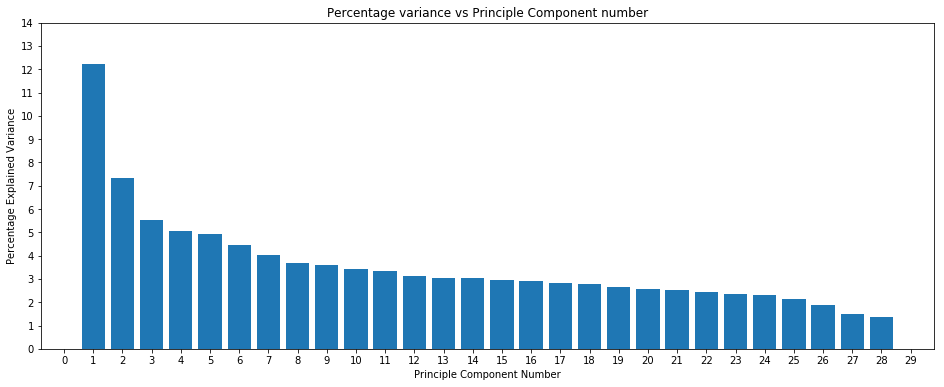

In [136]:
fig = plt.figure(figsize=(16,6))
plt.bar(a,pct_var,width = 0.8)
plt.title('Percentage variance vs Principle Component number')
plt.xlabel('Principle Component Number')
plt.ylabel('Percentage Explained Variance')
plt.xticks(np.arange(0,30,1))
plt.yticks(np.arange(0,15,1))
plt.show()

In [137]:
pca.explained_variance_ratio_

array([ 0.11647   ,  0.06990997,  0.0525611 ,  0.04831169,  0.04708768,
        0.04242737,  0.03852521,  0.03499001,  0.03414401,  0.03260683,
        0.03174012,  0.02983706,  0.029028  ,  0.02887966,  0.02835437,
        0.02789425,  0.02677357,  0.02641065,  0.02525942,  0.02462565,
        0.02415894,  0.02330736,  0.02248881,  0.02206723,  0.02032685,
        0.01796403,  0.01429892,  0.01305875])

In [138]:
sum(pca.explained_variance_ratio_)

0.95350754276676442

In [139]:
# In this numpy matrix array, each row represents a principal component, and each column relates back to the original features.
pca.components_

array([[ -1.92422808e-02,   2.29447356e-03,   1.76012702e-02, ...,
          1.80119083e-01,  -4.16672819e-03,   1.11173919e-02],
       [ -1.72121327e-01,   1.87781898e-01,   5.52969732e-02, ...,
         -2.53521968e-02,  -4.45933315e-02,   4.83545939e-03],
       [ -9.49154963e-05,   6.58890530e-02,   7.11725716e-02, ...,
         -3.82895726e-02,   3.06953094e-03,   4.58714766e-02],
       ..., 
       [ -1.86659866e-01,  -1.02252516e-01,  -4.43023485e-01, ...,
         -9.47601921e-03,   4.10917424e-02,   9.13836696e-02],
       [  2.14887637e-01,  -3.18960251e-01,  -1.31948354e-01, ...,
         -1.48055076e-03,   4.56149094e-02,  -3.63946738e-02],
       [ -2.87218086e-01,   3.77022194e-01,   1.28727504e-01, ...,
         -7.92725476e-02,  -9.65115692e-02,  -4.80146708e-02]])

In [140]:
pca.components_.shape

(28, 38)

In [141]:
cov_mat = np.cov(X_train_scaled , rowvar = False)

In [142]:
cov_mat.shape

(38, 38)

In [143]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [144]:
eigen_values

array([ 0.00824782,  0.03397121,  0.0421167 ,  0.0882796 ,  0.14171262,
        0.21716024,  0.24142534,  0.27653185,  0.32616831,  0.39180468,
        0.49643045,  0.54357589,  0.68290535,  0.77272859,  0.83888939,
        0.85491595,  0.88603327,  0.91840613,  0.93614814,  0.96024099,
        1.00400514,  1.01780169,  1.06040435,  1.07789599,  1.09786511,
        1.10350413,  1.13426072,  1.20660601,  1.23955405,  1.29799029,
        1.33015105,  1.46454228,  1.61288324,  1.79004593,  1.83657694,
        1.99811895,  2.65763894,  4.42762629])

In [145]:
eigen_vectors[0].shape

(38,)

In [146]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [147]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [148]:
np.transpose(eigenvector_subset)[0]

array([  1.92422808e-02,  -2.29447356e-03,  -1.76012702e-02,
        -1.05039299e-02,  -1.07496498e-01,  -1.02146702e-02,
        -3.21583653e-01,  -2.84679992e-01,  -9.59042139e-03,
        -4.71617465e-03,   1.63200645e-03,  -9.75955551e-03,
         1.38475691e-02,  -3.90683809e-02,  -8.25570624e-02,
        -3.09380871e-03,  -4.45099114e-01,  -4.27627305e-01,
         3.23235925e-03,   2.06292348e-03,   9.40045131e-03,
        -1.39847868e-02,  -4.28801866e-01,  -4.39070997e-01,
        -1.23949493e-03,   3.67787297e-02,  -2.60200023e-02,
        -3.93893400e-04,  -5.45671218e-03,  -4.60564747e-03,
        -8.06069234e-05,   1.14732939e-02,   1.34171447e-02,
         3.73966004e-02,  -4.74591874e-03,  -1.80119083e-01,
         4.16672819e-03,  -1.11173919e-02])

In [149]:
pca.components_[0]

array([ -1.92422808e-02,   2.29447356e-03,   1.76012702e-02,
         1.05039299e-02,   1.07496498e-01,   1.02146702e-02,
         3.21583653e-01,   2.84679992e-01,   9.59042139e-03,
         4.71617465e-03,  -1.63200645e-03,   9.75955551e-03,
        -1.38475691e-02,   3.90683809e-02,   8.25570624e-02,
         3.09380871e-03,   4.45099114e-01,   4.27627305e-01,
        -3.23235925e-03,  -2.06292348e-03,  -9.40045131e-03,
         1.39847868e-02,   4.28801866e-01,   4.39070997e-01,
         1.23949493e-03,  -3.67787297e-02,   2.60200023e-02,
         3.93893400e-04,   5.45671218e-03,   4.60564747e-03,
         8.06069234e-05,  -1.14732939e-02,  -1.34171447e-02,
        -3.73966004e-02,   4.74591874e-03,   1.80119083e-01,
        -4.16672819e-03,   1.11173919e-02])

In [150]:
f_comp = pd.DataFrame(pca.components_,columns=X.columns)

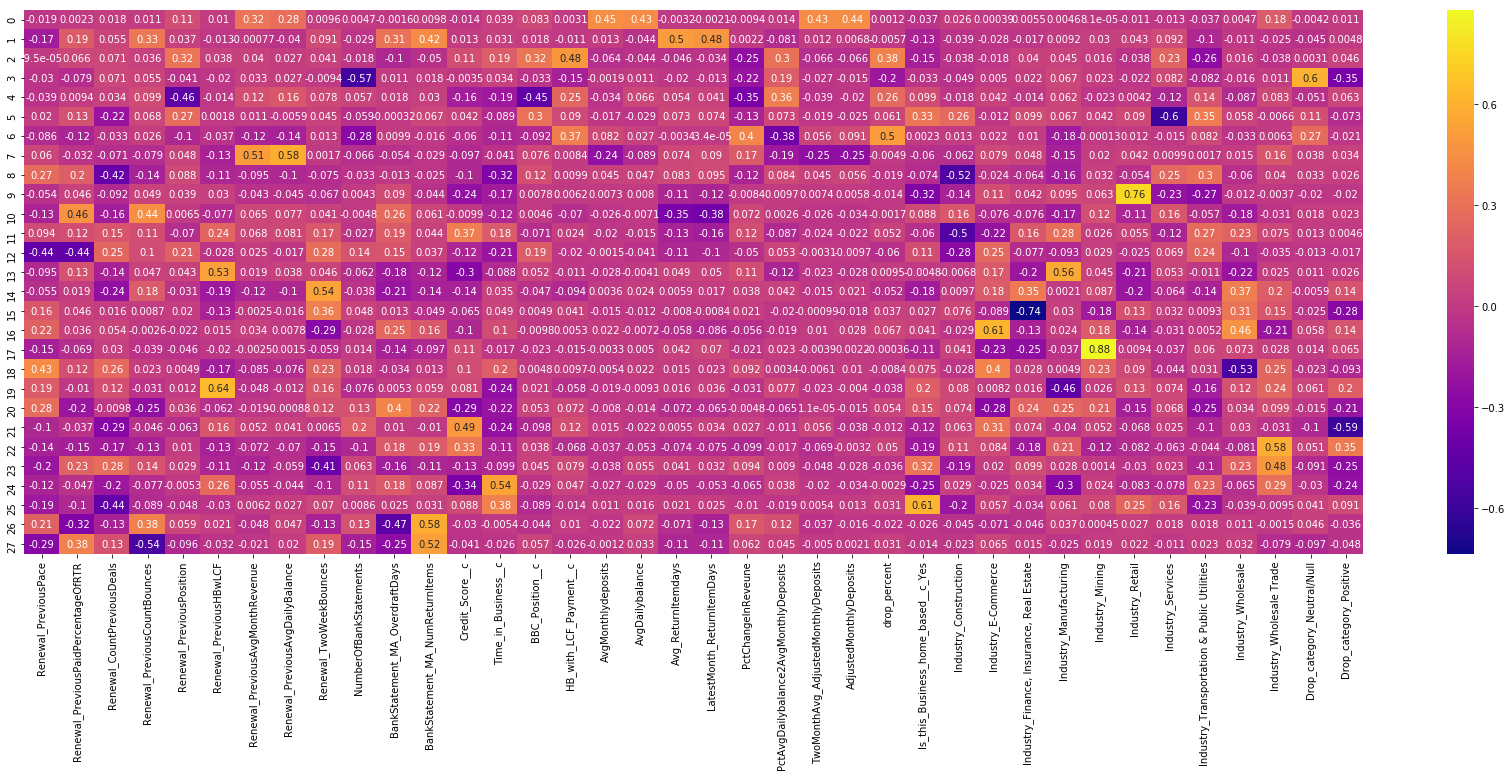

In [151]:
plt.figure(figsize=(30,10))
sns.heatmap(f_comp,cmap='plasma',annot=True)